In [1]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
# Variables
RANDOM_STATE = 42
TEST_SIZE = 0.25
LABEL = 'Label'

feature_names = [
    'area',
    'perimeter',
    'aspect_ratio',
    'extent',
    'convex_hull_area',           # Area of the convex hull
    'hull_perimeter',              # Perimeter of the convex hull
    'solidity',                    # Ratio of area to convex hull area
    'circularity',                 # Measure of how circular the shape is
    'eccentricity',                # Measure of the elongation of the shape
    'num_convexity_defects',       # Number of convexity defects
    'max_defect_depth',            # Maximum depth of convexity defects
    'major_axis_length',           # Length of the major axis of the fitted ellipse
    'minor_axis_length',           # Length of the minor axis of the fitted ellipse
    'orientation',                  # Orientation angle of the fitted ellipse
    'hu_moment',
    'centroid_x',
    'centroid_y'
]

In [3]:
# Dataset
df = pd.read_csv('data/exported_features.csv')

df

area    perimeter  aspect_ratio    extent  convex_hull_area  \
0    3572.5  2442.584033      1.204244  0.020873          116574.5   
1    3466.5  2417.162680      1.468354  0.023642          118040.0   
2    3617.5  2492.736272      1.412651  0.023233          128178.5   
3    4157.0  2674.179046      0.973469  0.017785          131505.5   
4    4088.0  2623.263184      0.686071  0.025754          130945.0   
..      ...          ...           ...       ...               ...   
128  5793.0  3708.187396      0.900172  0.019065          130635.5   
129  6574.0  4065.369082      0.793548  0.021551          154605.5   
130  5604.0  3562.566788      0.491409  0.033667          123660.5   
131  4872.5  3473.294713      1.794702  0.029768          113158.5   
132  4798.0  3430.223643      1.774086  0.029851          109605.5   

     hull_perimeter  solidity  circularity  eccentricity  \
0       1337.218530  0.030646     0.007525      0.786577   
1       1322.640449  0.029367     0.007456      0.777577   
2       1371.270651  0.028222     0.007316      0.790928   
3       1433.818989  0.031611     0.007305      0.879427   
4       1386.547892  0.031219     0.007465      0.782361   
..              ...       ...          ...           ...   
128     1585.972681  0.044345     0.005294      0.938362   
129     1735.043554  0.042521     0.004998      0.952249   
130     1507.569657  0.045318     0.005549      0.942170   
131     1441.344291  0.043059     0.005075      0.934264   
132     1425.331878  0.043775     0.005124      0.939060   

     num_convexity_defects  max_defect_depth  major_axis_length  \
0                     25.0        450.000000         483.927765   
1                     22.0        460.000000         475.419922   
2                     30.0        465.000000         500.557709   
3                     28.0        505.320312         589.605835   
4                     29.0        477.000000         493.956299   
..                     ...               ...                ...   
128                   22.0        601.707031         672.130432   
129                   21.0        619.144531         806.857422   
130                   20.0        578.000000         675.222351   
131                   22.0        538.000000         625.234985   
132                   19.0        530.000000         630.021301   

     minor_axis_length  orientation  hu_moment  centroid_x  centroid_y Label  
0           298.821808   114.080627  -0.973992       361.0       518.0     r  
1           298.937927    96.294014  -0.984618       346.0       468.0     r  
2           306.295959    82.494965  -1.000307       334.0       428.0     r  
3           280.672668   141.468872  -0.958779       338.0       534.0     r  
4           307.648163     1.478440  -0.946377       311.0       539.0     r  
..                 ...          ...        ...         ...         ...   ...  
128         232.324799    41.575718  -0.819922       294.0       471.0     s  
129         246.352722    26.190271  -0.844050       286.0       462.0     s  
130         226.290863   170.445297  -0.785404       289.0       480.0     s  
131         222.947983    78.269814  -0.786318       317.0       427.0     s  
132         216.571991    77.774551  -0.778607       313.0       434.0     s  

[133 rows x 18 columns]

In [4]:
# Find all records with missing values
nan_records = df[df.isna().any(axis=1)]

nan_records

Empty DataFrame
Columns: [area, perimeter, aspect_ratio, extent, convex_hull_area, hull_perimeter, solidity, circularity, eccentricity, num_convexity_defects, max_defect_depth, major_axis_length, minor_axis_length, orientation, hu_moment, centroid_x, centroid_y, Label]
Index: []

In [5]:
# Split dataset
train_X, test_X, train_y, test_y = train_test_split(df.drop(LABEL, axis=1), df[LABEL], test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [6]:
# Functions

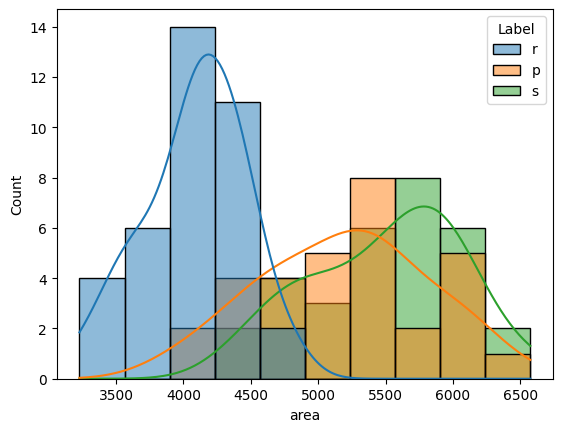

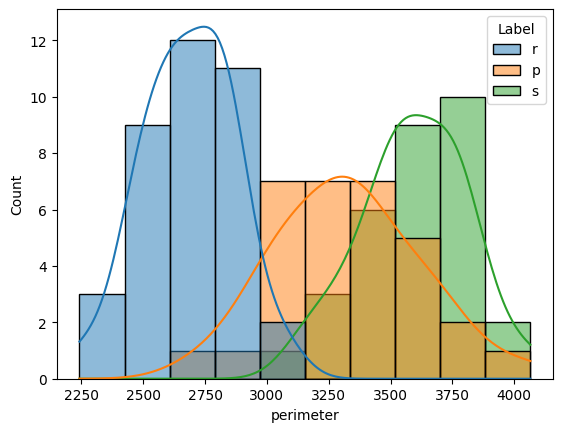

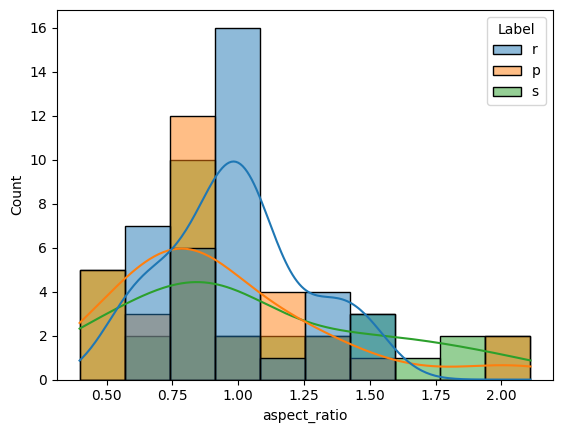

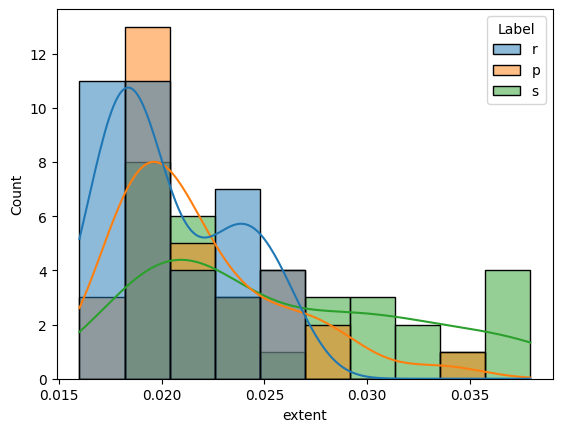

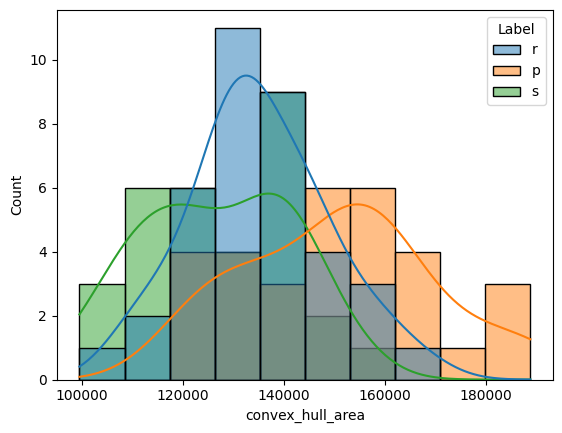

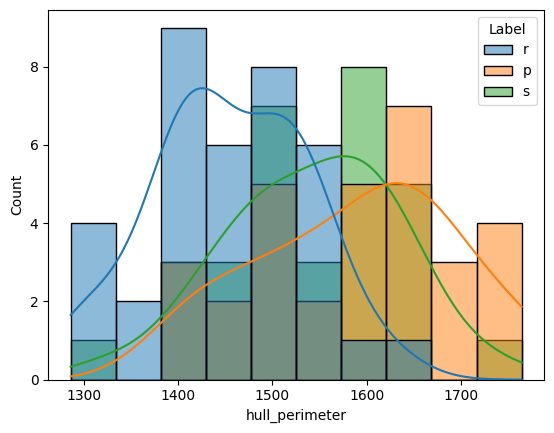

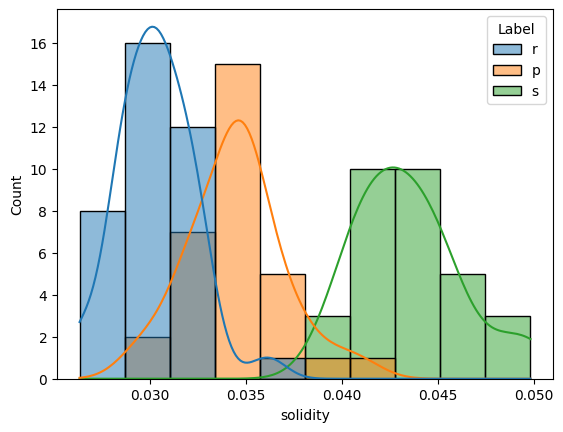

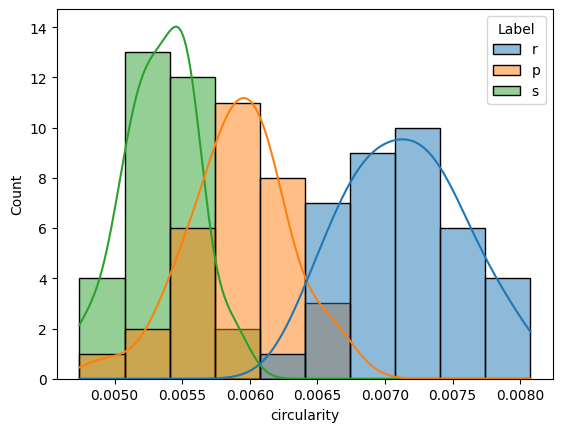

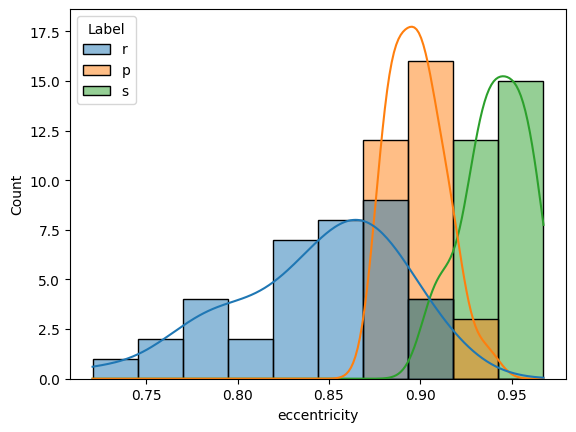

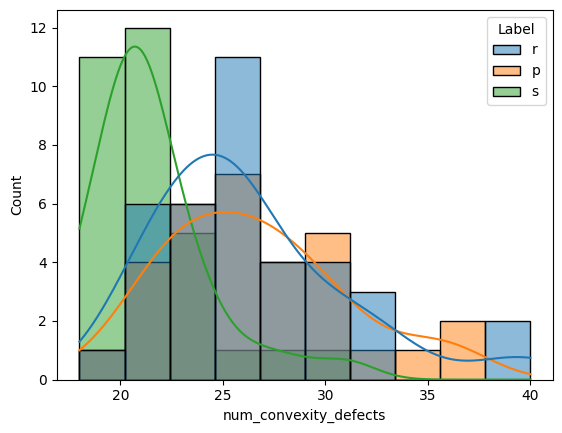

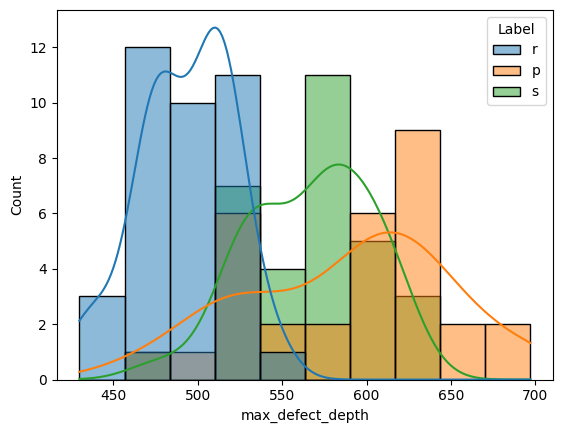

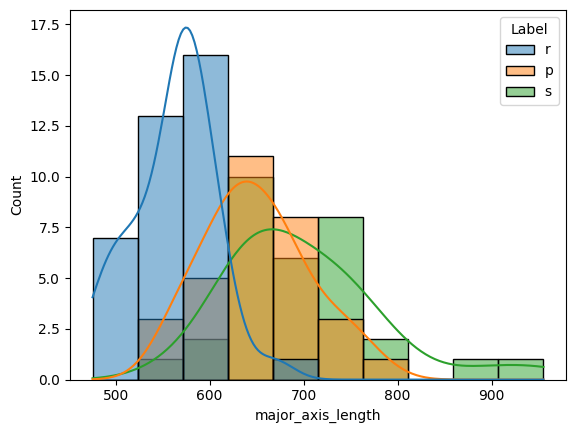

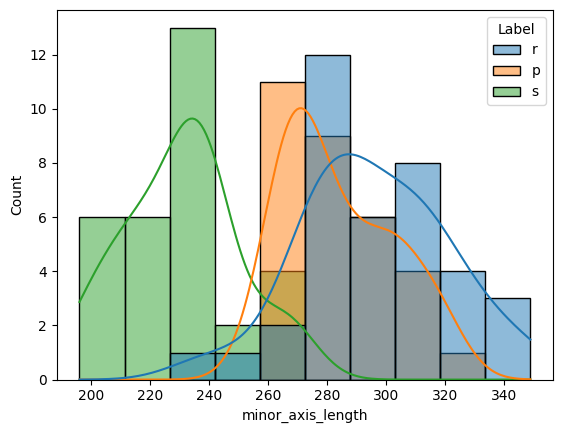

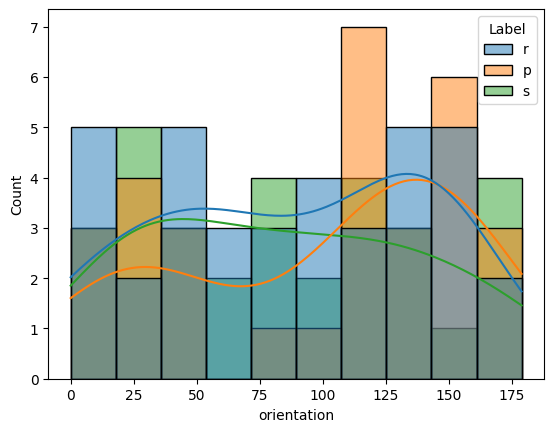

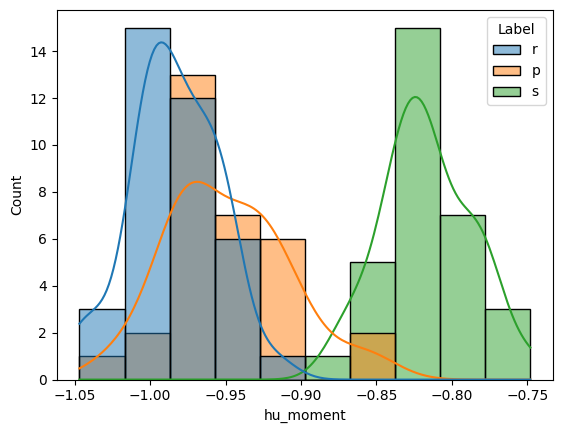

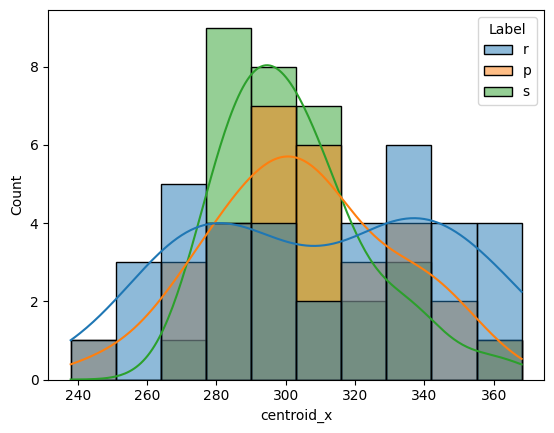

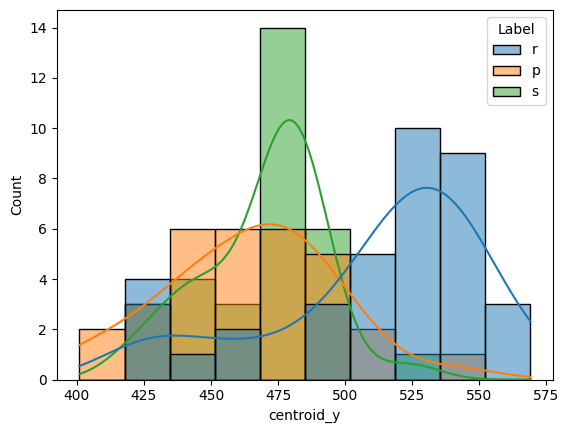

In [7]:
# Histograms
for feature in feature_names:
    sns.histplot(df, x=feature, hue=train_y, kde=True, bins=10)
    plt.show()

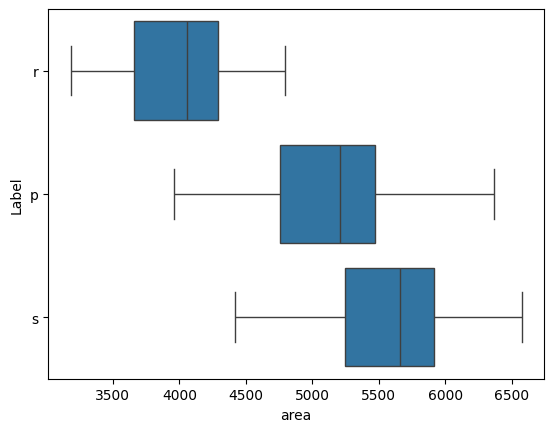

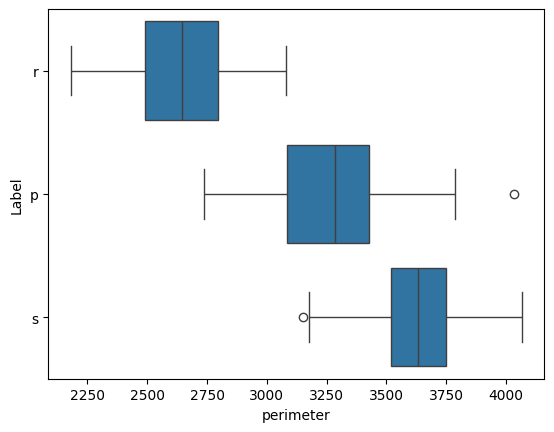

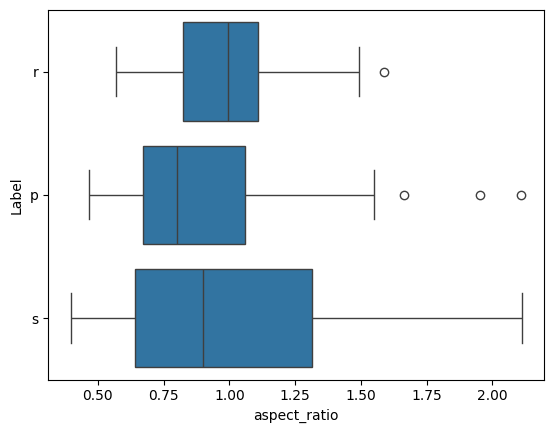

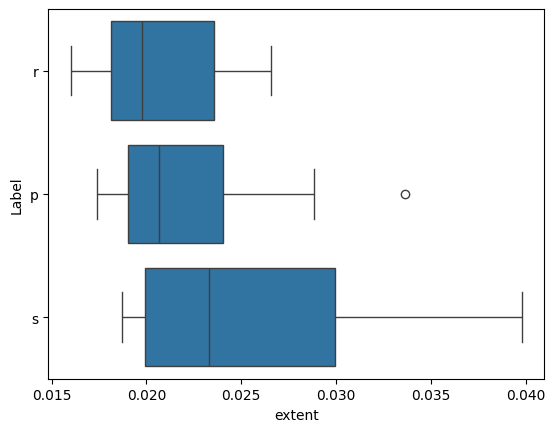

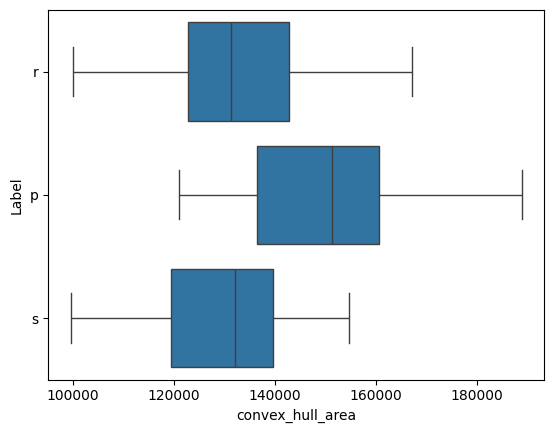

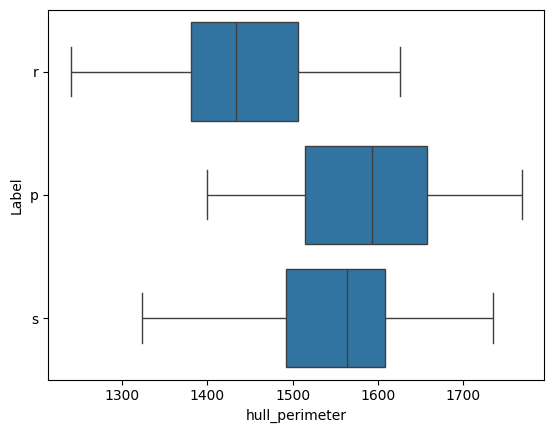

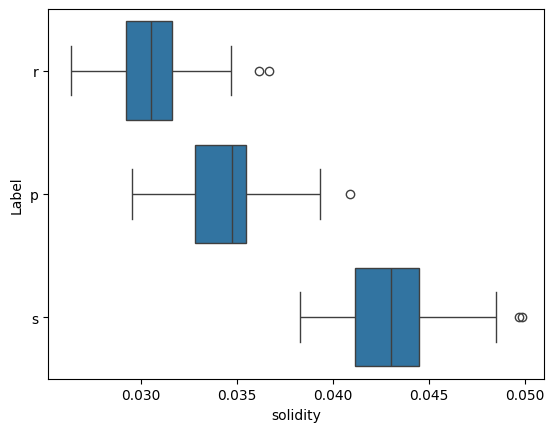

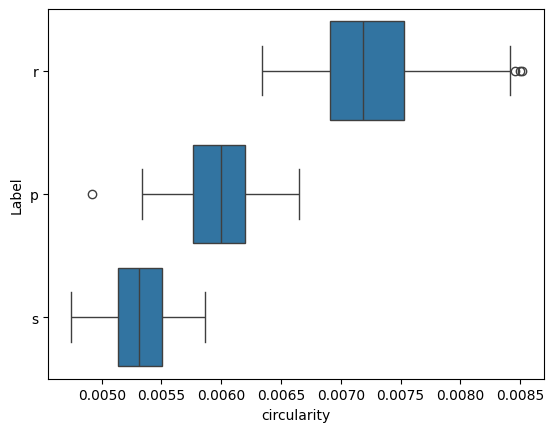

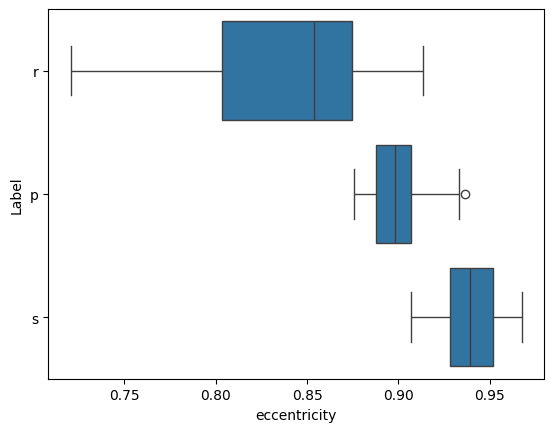

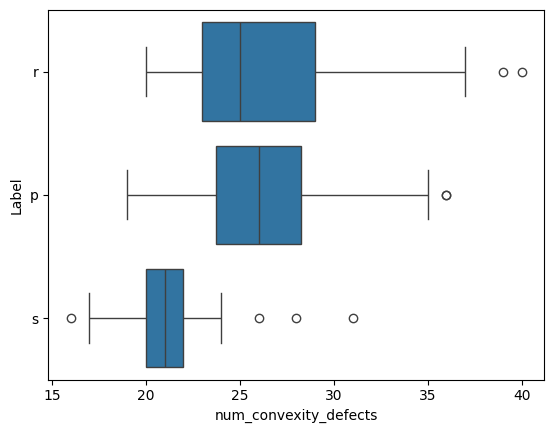

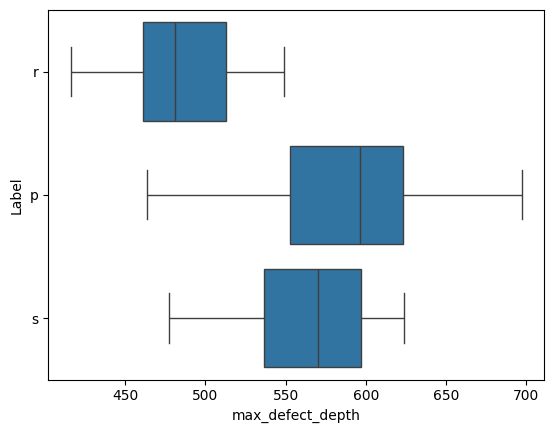

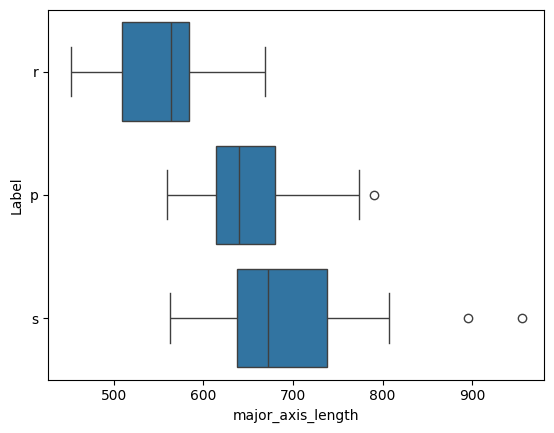

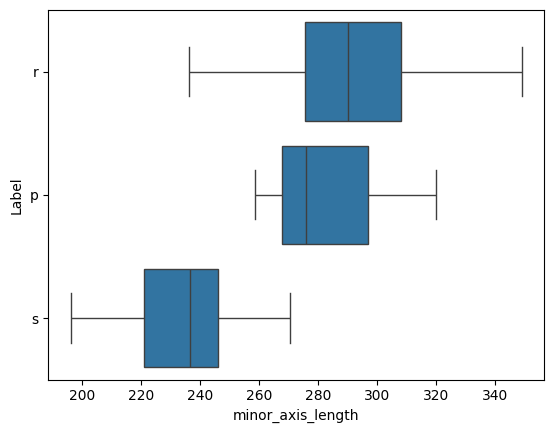

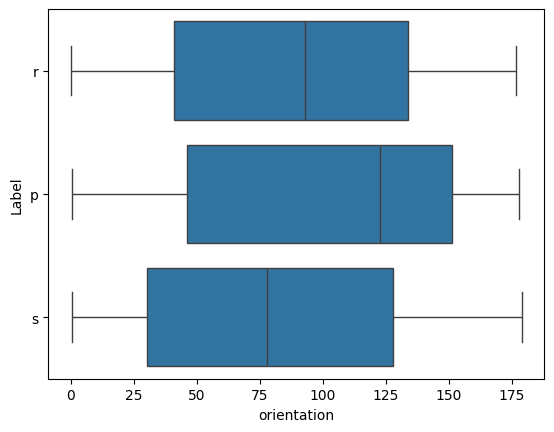

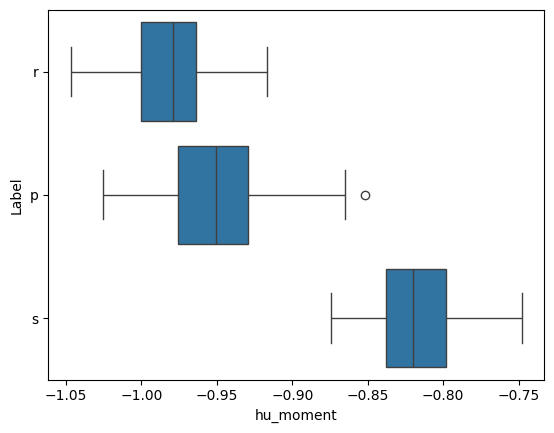

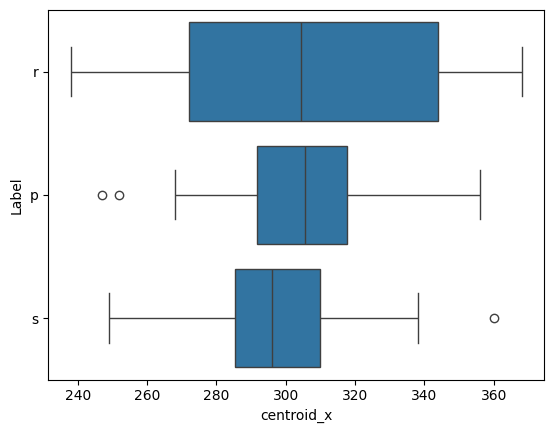

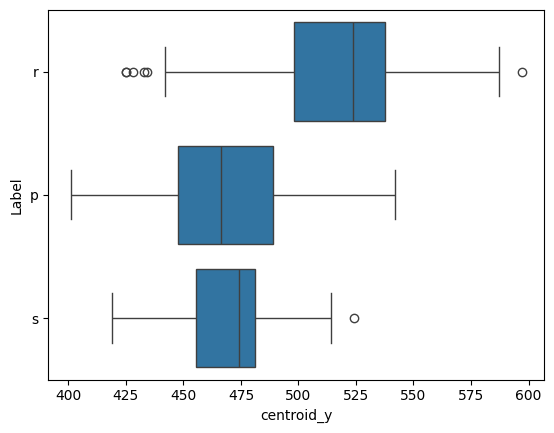

In [8]:
# Boxplots
# Create boxplots for each feature but with the 3 labels separate
for feature in feature_names:
    sns.boxplot(y=LABEL, x=feature, data=df)
    plt.show()

In [9]:
# Correlation matrix
# Calculate the correlation coefficient
df_corr = df.drop(LABEL, axis=1).corr()

df_corr


area  perimeter  aspect_ratio    extent  \
area                   1.000000   0.970741     -0.440821  0.239445   
perimeter              0.970741   1.000000     -0.273326  0.291037   
aspect_ratio          -0.440821  -0.273326      1.000000 -0.050176   
extent                 0.239445   0.291037     -0.050176  1.000000   
convex_hull_area       0.515273   0.425861     -0.512738 -0.235758   
hull_perimeter         0.841597   0.797810     -0.492906 -0.090583   
solidity               0.681323   0.731153     -0.040075  0.461499   
circularity           -0.860212  -0.952863      0.056736 -0.295619   
eccentricity           0.720729   0.767161     -0.111962  0.179578   
num_convexity_defects -0.329673  -0.369368      0.068288 -0.210026   
max_defect_depth       0.872885   0.831137     -0.427791  0.197775   
major_axis_length      0.794020   0.800352     -0.234264 -0.001729   
minor_axis_length     -0.369711  -0.457391     -0.170119 -0.356753   
orientation           -0.034091  -0.025843      0.070697 -0.187782   
hu_moment              0.626367   0.688278     -0.001935  0.549026   
centroid_x            -0.182585  -0.166097      0.146077 -0.109577   
centroid_y            -0.372013  -0.461308     -0.241472 -0.331886   

                       convex_hull_area  hull_perimeter  solidity  \
area                           0.515273        0.841597  0.681323   
perimeter                      0.425861        0.797810  0.731153   
aspect_ratio                  -0.512738       -0.492906 -0.040075   
extent                        -0.235758       -0.090583  0.461499   
convex_hull_area               1.000000        0.839873 -0.266688   
hull_perimeter                 0.839873        1.000000  0.237017   
solidity                      -0.266688        0.237017  1.000000   
circularity                   -0.329043       -0.715113 -0.702090   
eccentricity                   0.059759        0.539477  0.772185   
num_convexity_defects          0.244397       -0.089533 -0.582285   
max_defect_depth               0.665966        0.841753  0.413273   
major_axis_length              0.415050        0.770107  0.551491   
minor_axis_length              0.533489        0.015607 -0.873711   
orientation                    0.098080        0.107846 -0.107487   
hu_moment                     -0.292782        0.149636  0.951560   
centroid_x                    -0.103242       -0.112506 -0.118048   
centroid_y                    -0.111183       -0.276715 -0.319996   

                       circularity  eccentricity  num_convexity_defects  \
area                     -0.860212      0.720729              -0.329673   
perimeter                -0.952863      0.767161              -0.369368   
aspect_ratio              0.056736     -0.111962               0.068288   
extent                   -0.295619      0.179578              -0.210026   
convex_hull_area         -0.329043      0.059759               0.244397   
hull_perimeter           -0.715113      0.539477              -0.089533   
solidity                 -0.702090      0.772185              -0.582285   
circularity               1.000000     -0.768183               0.379002   
eccentricity             -0.768183      1.000000              -0.472907   
num_convexity_defects     0.379002     -0.472907               1.000000   
max_defect_depth         -0.737678      0.580964              -0.113915   
major_axis_length        -0.758007      0.823915              -0.252563   
minor_axis_length         0.496445     -0.781913               0.589126   
orientation              -0.010243      0.053885               0.017067   
hu_moment                -0.662678      0.668110              -0.580252   
centroid_x                0.112725     -0.024042              -0.103238   
centroid_y                0.555904     -0.295599               0.148404   

                       max_defect_depth  major_axis_length  minor_axis_length  \
area                           0.872885           0.794020          -0.369711   
perimeter 

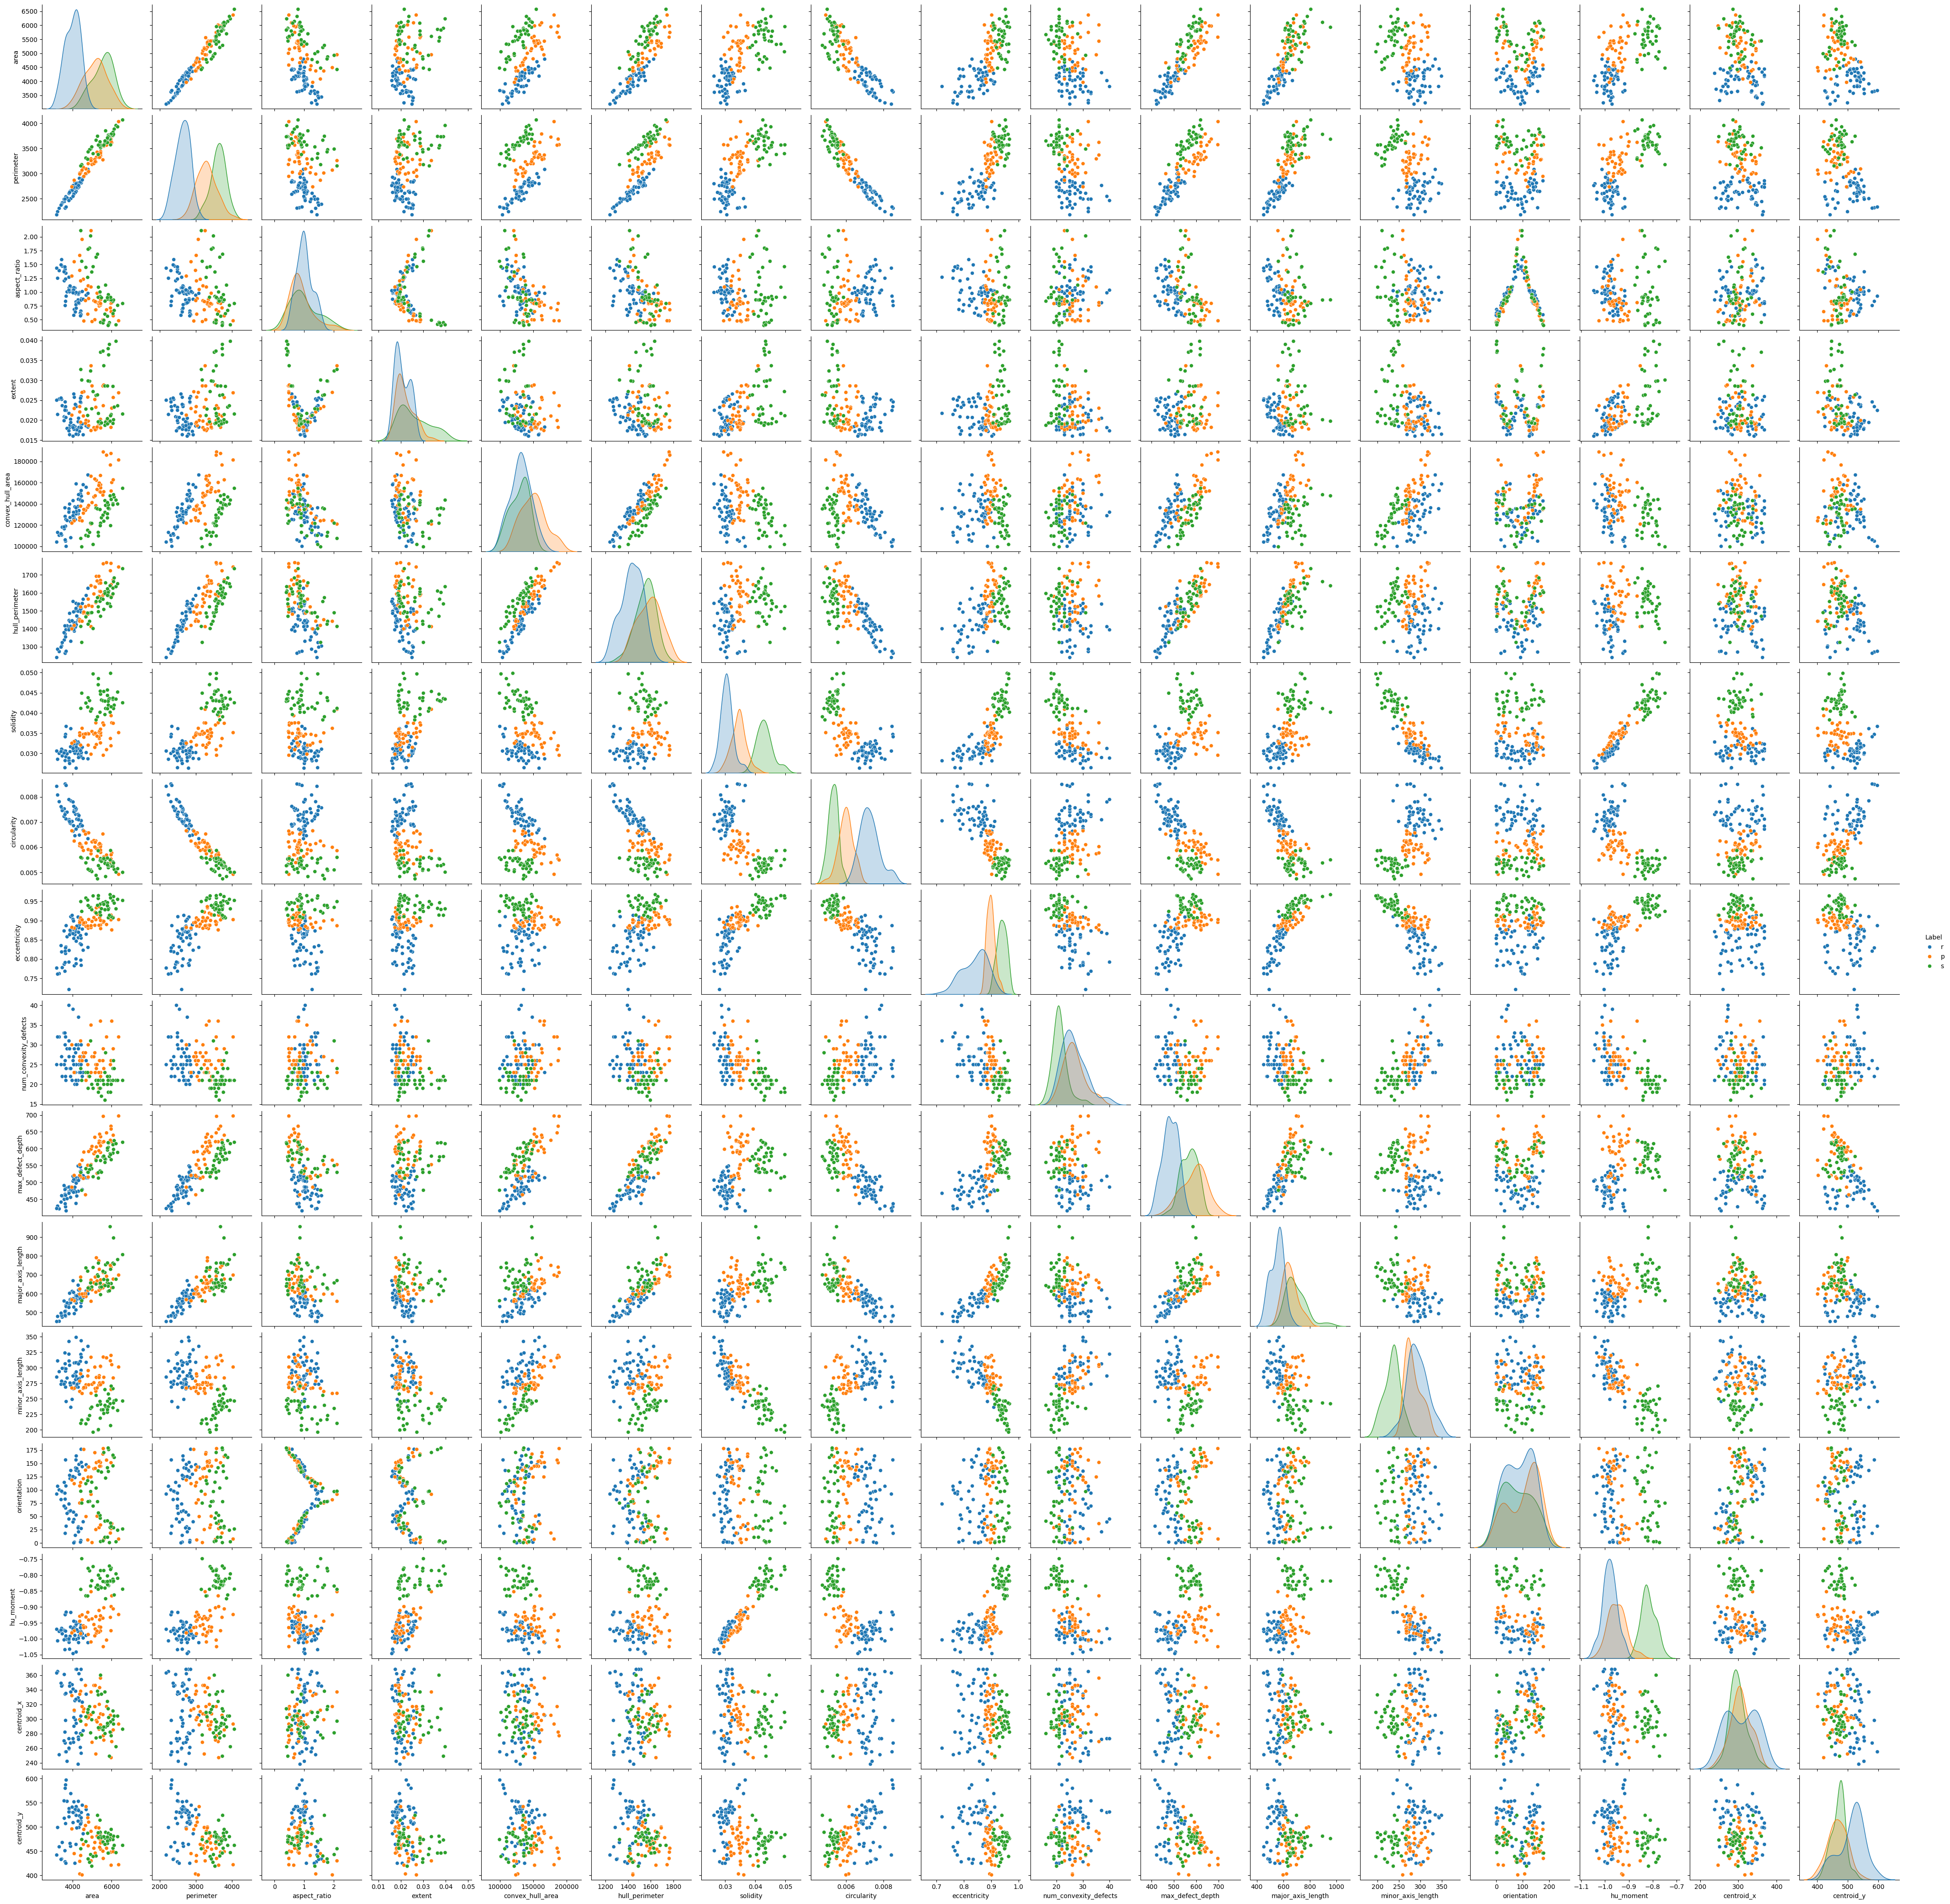

In [10]:
# Scatterplots
# Create one big pairplot with all the features paired against each other
sns.pairplot(df, hue=LABEL)
plt.show()
        

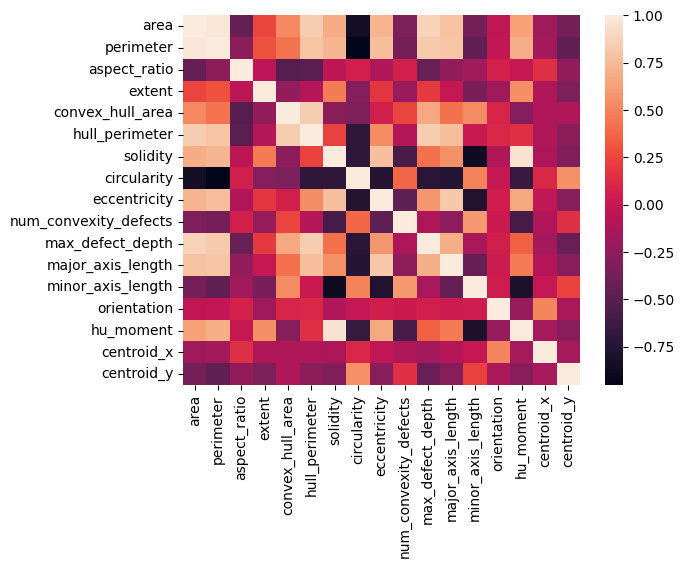

In [11]:
# Heat scatterplots
sns.heatmap(df_corr,annot=False)
plt.show()

area, perimeter, solidity, circularity, eccentricity, hu_moment, major_axis_length en minor_axis_length lijken interessante features om mee te nemen aan de hand van de boxplot. Verder onderzoeken of ze onderling sterke positieve correlaties hebben want er zijn er wel een paar zo op het oog, dit kan potentieel betekenen dat sommige al bestaan in andere door sterke positieve correlaties.

In [12]:
# Define selected features
features = ['area', 'perimeter', 'solidity', 'circularity', 'eccentricity', 'hu_moment', 'major_axis_length', 'minor_axis_length', LABEL]

df = df[features]

df

area    perimeter  solidity  circularity  eccentricity  hu_moment  \
0    3572.5  2442.584033  0.030646     0.007525      0.786577  -0.973992   
1    3466.5  2417.162680  0.029367     0.007456      0.777577  -0.984618   
2    3617.5  2492.736272  0.028222     0.007316      0.790928  -1.000307   
3    4157.0  2674.179046  0.031611     0.007305      0.879427  -0.958779   
4    4088.0  2623.263184  0.031219     0.007465      0.782361  -0.946377   
..      ...          ...       ...          ...           ...        ...   
128  5793.0  3708.187396  0.044345     0.005294      0.938362  -0.819922   
129  6574.0  4065.369082  0.042521     0.004998      0.952249  -0.844050   
130  5604.0  3562.566788  0.045318     0.005549      0.942170  -0.785404   
131  4872.5  3473.294713  0.043059     0.005075      0.934264  -0.786318   
132  4798.0  3430.223643  0.043775     0.005124      0.939060  -0.778607   

     major_axis_length  minor_axis_length Label  
0           483.927765         298.821808     r  
1           475.419922         298.937927     r  
2           500.557709         306.295959     r  
3           589.605835         280.672668     r  
4           493.956299         307.648163     r  
..                 ...                ...   ...  
128         672.130432         232.324799     s  
129         806.857422         246.352722     s  
130         675.222351         226.290863     s  
131         625.234985         222.947983     s  
132         630.021301         216.571991     s  

[133 rows x 9 columns]

In [13]:
# Correlation matrix
# Calculate the correlation coefficient
df_corr = df.drop(LABEL, axis=1).corr()
df_corr

area  perimeter  solidity  circularity  eccentricity  \
area               1.000000   0.970741  0.681323    -0.860212      0.720729   
perimeter          0.970741   1.000000  0.731153    -0.952863      0.767161   
solidity           0.681323   0.731153  1.000000    -0.702090      0.772185   
circularity       -0.860212  -0.952863 -0.702090     1.000000     -0.768183   
eccentricity       0.720729   0.767161  0.772185    -0.768183      1.000000   
hu_moment          0.626367   0.688278  0.951560    -0.662678      0.668110   
major_axis_length  0.794020   0.800352  0.551491    -0.758007      0.823915   
minor_axis_length -0.369711  -0.457391 -0.873711     0.496445     -0.781913   

                   hu_moment  major_axis_length  minor_axis_length  
area                0.626367           0.794020          -0.369711  
perimeter           0.688278           0.800352          -0.457391  
solidity            0.951560           0.551491          -0.873711  
circularity        -0.662678          -0.758007           0.496445  
eccentricity        0.668110           0.823915          -0.781913  
hu_moment           1.000000           0.462592          -0.802912  
major_axis_length   0.462592           1.000000          -0.441038  
minor_axis_length  -0.802912          -0.441038           1.000000

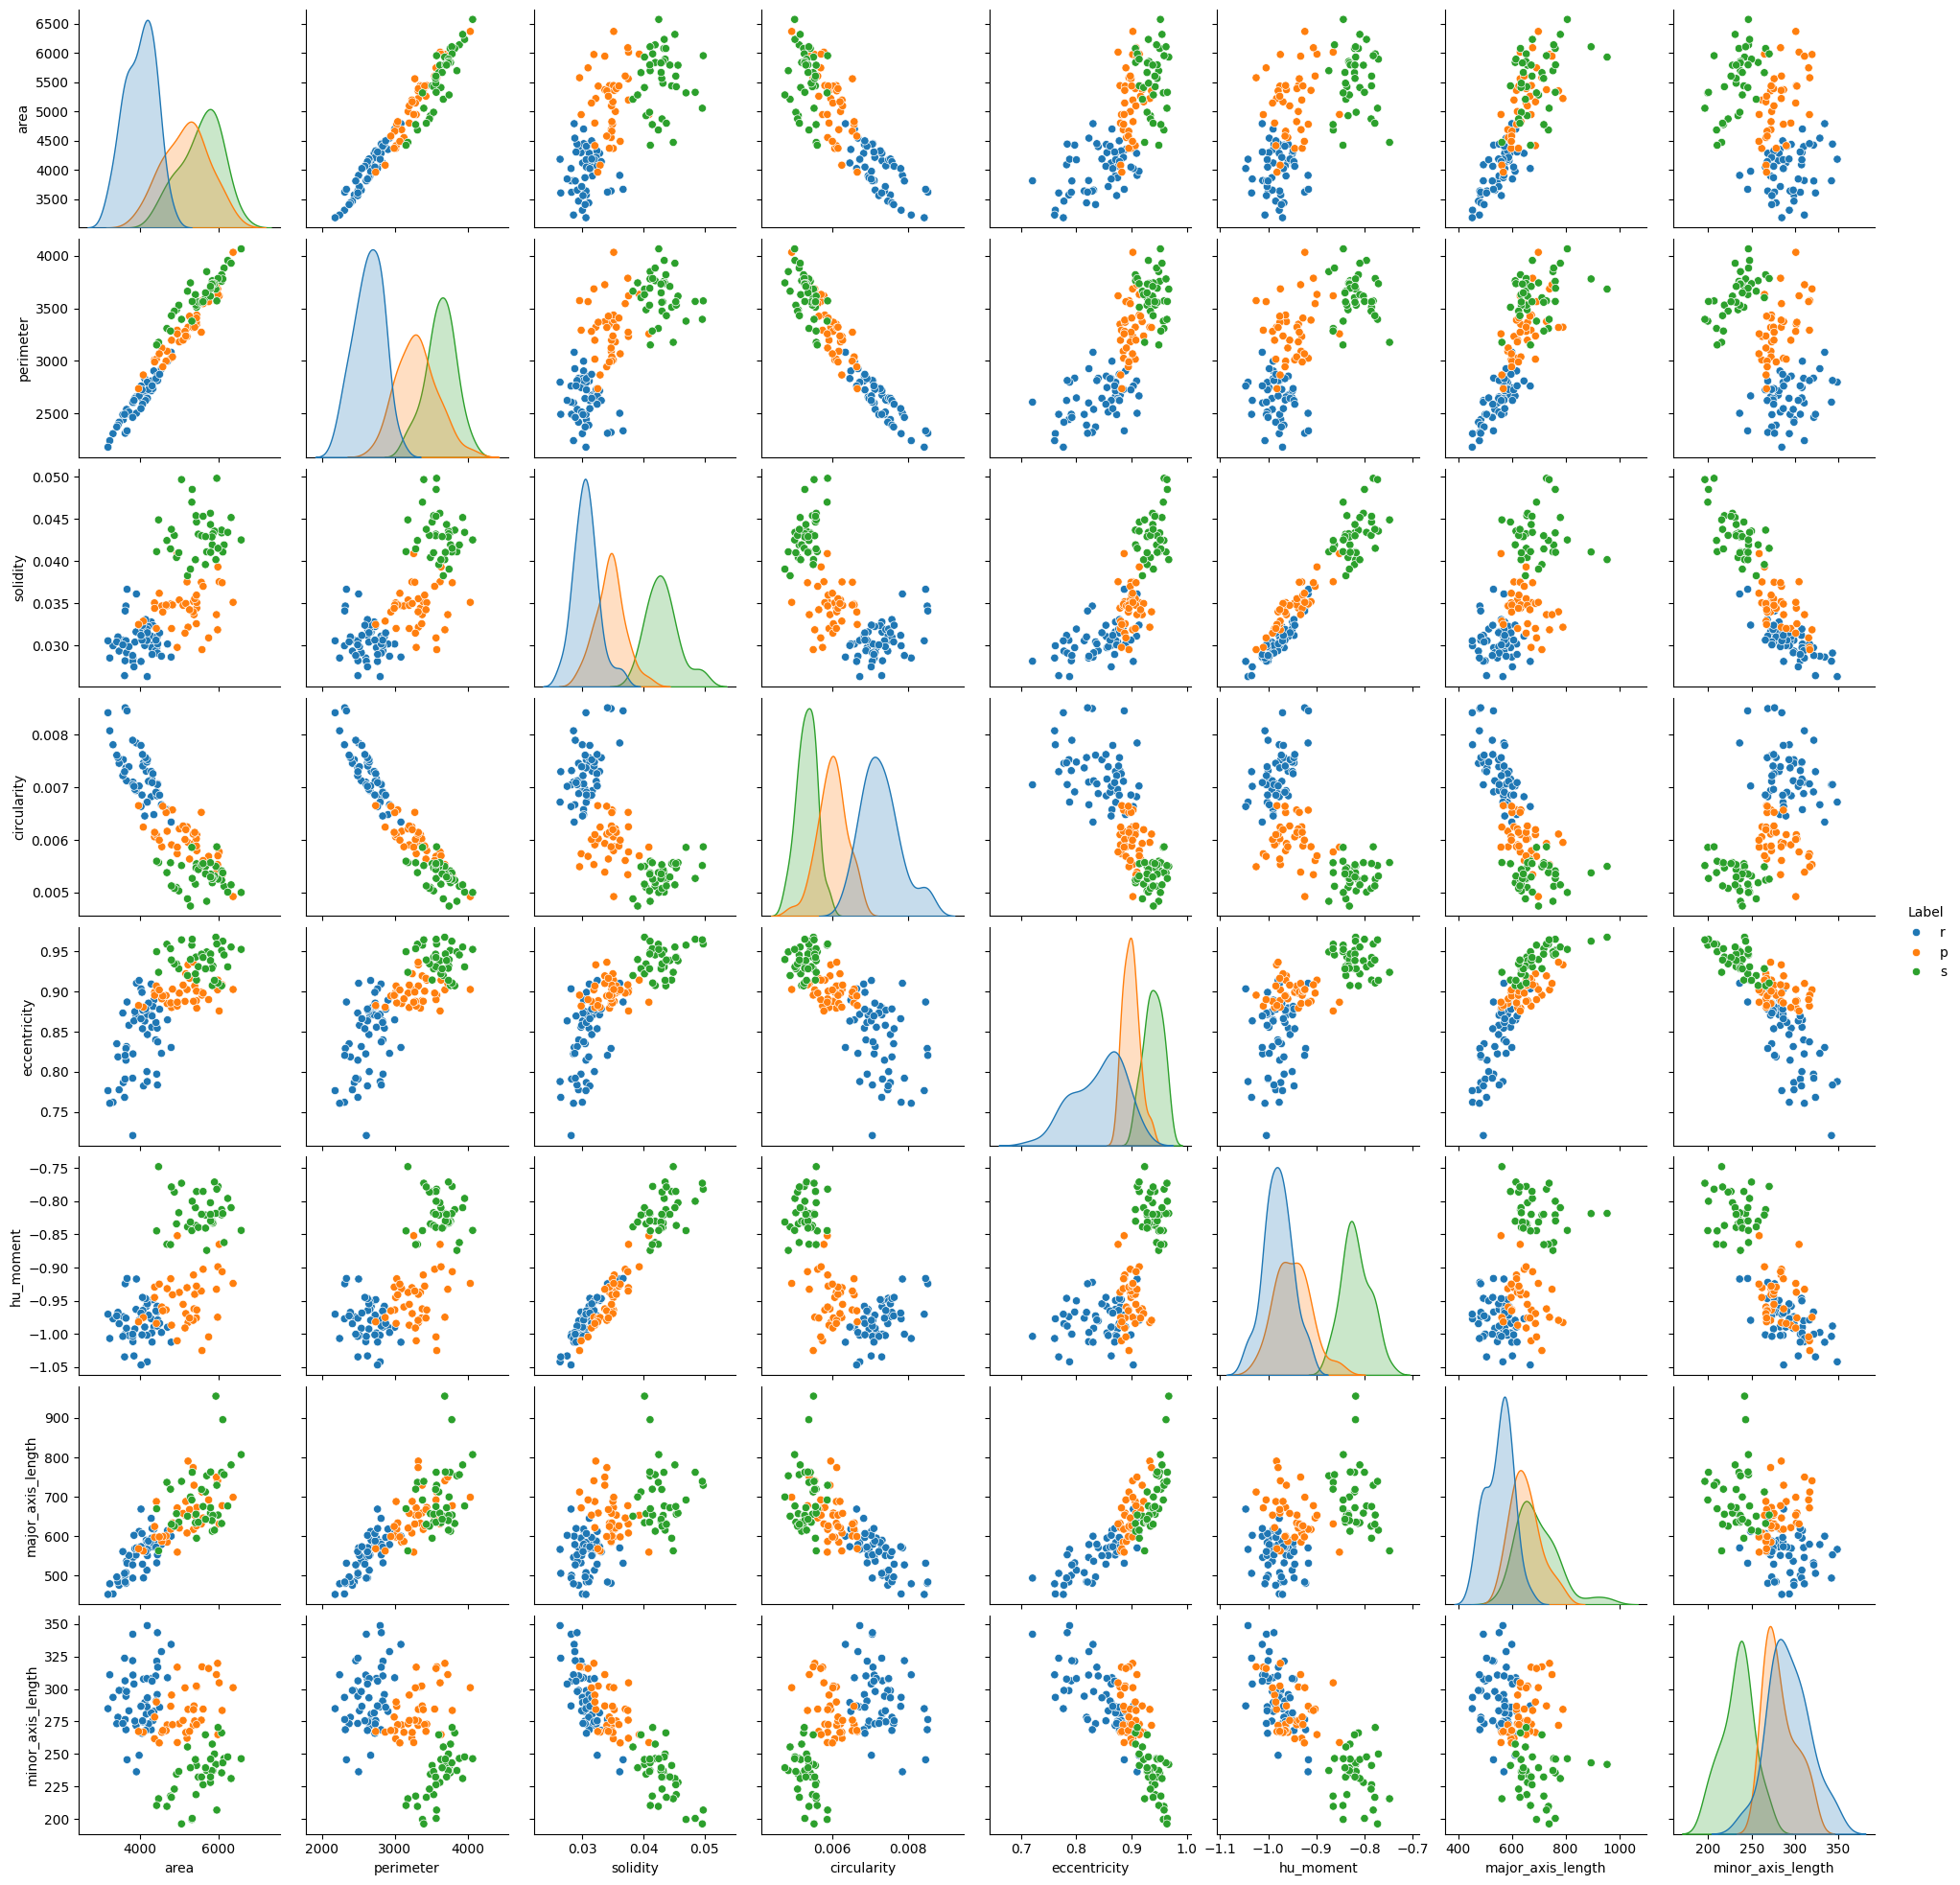

In [14]:
# Pair plot with just the interesting features
sns.pairplot(df, hue=LABEL)
plt.show()

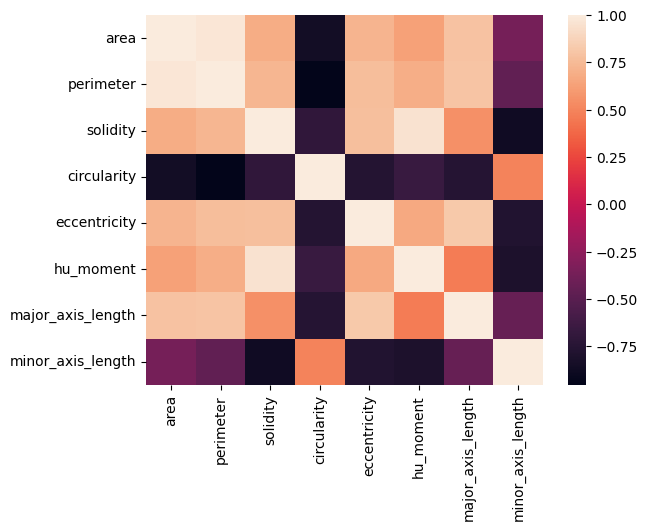

In [15]:
# Heat scatterplots
sns.heatmap(df_corr,annot=False)
plt.show()

In [16]:
# Export features to hand_gesture_features.csv